### **Performances before Conformal Prediction**

In [3]:
import sys
import os
import pandas as pd
current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))

from utils.wrapper import YOLOAPIWrappper
from utils.pipeline import CPPipeline
from utils.helpers import iou, ioa

##### **Getting GT and YOLO Preds**

In [4]:
import pickle

with open("/home/aws_install/conformal_runway_detection/before_cp/v6_all_test_m.pickle", "rb") as f:
    data = pickle.load(f)
    print(data.keys())  # pour voir s'il y a "matched_scores" ou "matched_score"
print(data)

dict_keys(['y_preds', 'y_trues', 'images', 'labels', 'scores'])
{'y_preds': array([[ 924.76434326,  478.81149292,  974.47772217,  545.06799316],
       [ 929.06188965,  393.70037842, 1017.39416504,  489.81414795],
       [ 618.81854248,  372.3024292 , 1200.97387695,  681.08868408],
       ...,
       [ 767.53839111,  330.00860596,  973.08746338,  492.60406494],
       [1118.6932373 ,  481.34887695, 1325.08459473,  541.17785645],
       [1731.39916992, 1142.9810791 , 1817.92016602, 1237.99401855]]), 'y_trues': array([[ 931.,  477.,  968.,  539.],
       [ 928.,  393., 1015.,  490.],
       [ 610.,  370., 1206.,  686.],
       ...,
       [ 765.,  327.,  972.,  493.],
       [1112.,  481., 1325.,  542.],
       [1730., 1140., 1815., 1238.]]), 'images': ['/home/aws_install/data/yolo_database/images/test/0CLSYZPFbTg_LTAI20.png', '/home/aws_install/data/yolo_database/images/test/0CLSYZPFbTg_LTAI22.png', '/home/aws_install/data/yolo_database/images/test/0CLSYZPFbTg_LTAI24.png', '/home/aws_in

In [5]:
v6 = "../utils/v6/bestv6.onnx"
yolov6_detector = YOLOAPIWrappper(v6,file_path='v6_all_test_m.pickle', conf_thres=0.7, iou_thres=0.5)
pipev6 = CPPipeline(yolov6_detector, test_set='test', method='multiplicative')

X_v6, Y_v6, labels_v6= pipev6.extract_yolo_dataset()
y_preds_v6, matched_trues_v6, images_v6, classes, scorev6 = yolov6_detector.query(X_v6, Y_v6, labels_v6)

print("Predictions:", y_preds_v6)
print("Matched Ground Truths:", matched_trues_v6)
print("Images:", images_v6)
print("Classes:", classes)
print("Scores:", scorev6)

Predictions: [[ 924.76434326  478.81149292  974.47772217  545.06799316]
 [ 929.06188965  393.70037842 1017.39416504  489.81414795]
 [ 618.81854248  372.3024292  1200.97387695  681.08868408]
 ...
 [ 767.53839111  330.00860596  973.08746338  492.60406494]
 [1118.6932373   481.34887695 1325.08459473  541.17785645]
 [1731.39916992 1142.9810791  1817.92016602 1237.99401855]]
Matched Ground Truths: [[ 931.  477.  968.  539.]
 [ 928.  393. 1015.  490.]
 [ 610.  370. 1206.  686.]
 ...
 [ 765.  327.  972.  493.]
 [1112.  481. 1325.  542.]
 [1730. 1140. 1815. 1238.]]
Images: ['/home/aws_install/data/yolo_database/images/test/0CLSYZPFbTg_LTAI20.png', '/home/aws_install/data/yolo_database/images/test/0CLSYZPFbTg_LTAI22.png', '/home/aws_install/data/yolo_database/images/test/0CLSYZPFbTg_LTAI24.png', '/home/aws_install/data/yolo_database/images/test/0fiHJrxfJPE_KSFO35.png', '/home/aws_install/data/yolo_database/images/test/0fiHJrxfJPE_KSFO37.png', '/home/aws_install/data/yolo_database/images/test/0f

In [6]:
v5 = "../utils/v5/bestv5.onnx"
yolov5_detector = YOLOAPIWrappper(v5,file_path='v5_all_test_m.pickle', conf_thres=0.7, iou_thres=0.5)
pipev5 = CPPipeline(yolov5_detector, test_set='test', method='multiplicative')

X_v5, Y_v5, labels_v5= pipev6.extract_yolo_dataset()
y_preds_v5, matched_trues_v5, images_v5, classes, scorev5 = yolov5_detector.query(X_v5, Y_v5, labels_v5)

print("Predictions:", y_preds_v5)
print("Matched Ground Truths:", matched_trues_v5)
print("Images:", images_v5)
print("Classes:", classes)
print("Scores:", scorev5)

Predictions: [[ 926.96252441  478.15634155  973.03259277  545.65576172]
 [ 931.33935547  393.9362793  1012.67749023  489.00946045]
 [ 624.28491211  373.57354736 1192.45202637  677.41717529]
 ...
 [1109.54187012  480.50714111 1333.30065918  543.55755615]
 [1773.37402344 1128.85046387 1815.90014648 1197.01599121]
 [1732.44775391 1145.52783203 1810.81396484 1237.53076172]]
Matched Ground Truths: [[ 931.  477.  968.  539.]
 [ 928.  393. 1015.  490.]
 [ 610.  370. 1206.  686.]
 ...
 [1112.  481. 1325.  542.]
 [1772. 1130. 1820. 1199.]
 [1730. 1140. 1815. 1238.]]
Images: ['/home/aws_install/data/yolo_database/images/test/0CLSYZPFbTg_LTAI20.png', '/home/aws_install/data/yolo_database/images/test/0CLSYZPFbTg_LTAI22.png', '/home/aws_install/data/yolo_database/images/test/0CLSYZPFbTg_LTAI24.png', '/home/aws_install/data/yolo_database/images/test/0fiHJrxfJPE_KSFO35.png', '/home/aws_install/data/yolo_database/images/test/0fiHJrxfJPE_KSFO37.png', '/home/aws_install/data/yolo_database/images/test/0f

In [13]:
filenames = []
all_preds_v6 = []
all_trues_v6 = []
all_classes_v6 = []
iou_v6 = []
score_v6 = []

for img_path_, preds_, trues_, clss_, scores_  in zip(images_v6, y_preds_v6, matched_trues_v6, classes, scorev6):
    filenames.append(os.path.basename(img_path_))
    all_preds_v6.append(preds_)
    all_trues_v6.append(trues_)
    all_classes_v6.append(clss_)
    iou_v6.append(iou(preds_, trues_)) 
    score_v6.append(scores_)

df_v6 = pd.DataFrame({
    'filename': filenames,
    'pred_yolo_v6': all_preds_v6,
    'gt_v6': all_trues_v6,
    'class_v6': all_classes_v6,
    'iou_v6': iou_v6,
    'score_v6': score_v6
})

filenames_v5 = []
all_preds_v5 = []
all_trues_v5 = []
all_classes_v5 = []
iou_v5 = []
score_v5 = []

for img_path, preds, trues, clss, scores in zip(images_v5, y_preds_v5, matched_trues_v5, classes, scorev5):
    filenames_v5.append(os.path.basename(img_path))
    all_preds_v5.append(preds)
    all_trues_v5.append(trues)
    all_classes_v5.append(clss)
    iou_v5.append(iou(preds, trues))  
    score_v5.append(scores)

df_v5 = pd.DataFrame({
    'filename': filenames_v5,
    'pred_yolo_v5': all_preds_v5,
    'gt_v5': all_trues_v5,
    'class_v5': all_classes_v5,
    'iou_v5': iou_v5,
    'score_v5': score_v5
})

df_combined = pd.merge(df_v6, df_v5, on='filename', how='outer')
df_combined.to_csv("results_before_cp_m.csv", index=False)

print(df_combined.head())

                 filename                                       pred_yolo_v6  \
0  0CLSYZPFbTg_LTAI20.png  [924.7643432617188, 478.8114929199219, 974.477...   
1  0CLSYZPFbTg_LTAI22.png  [929.0618896484375, 393.70037841796875, 1017.3...   
2  0CLSYZPFbTg_LTAI24.png  [618.8185424804688, 372.30242919921875, 1200.9...   
3  0fiHJrxfJPE_KSFO35.png  [1736.1031494140625, 954.5250854492188, 1806.8...   
4  0fiHJrxfJPE_KSFO37.png  [1734.22998046875, 924.9478759765625, 1872.593...   

                                               gt_v6  class_v6    iou_v6  \
0                       [931.0, 477.0, 968.0, 539.0]       0.0  0.662621   
1  [928.0, 392.99999999999994, 1015.0, 489.999999...       0.0  0.952789   
2                      [610.0, 370.0, 1206.0, 686.0]       0.0  0.954473   
3                    [1737.0, 945.0, 1806.0, 1032.0]       0.0  0.833707   
4                    [1740.0, 919.0, 1874.0, 1038.0]       0.0  0.883911   

   score_v6                                       pred_yolo_v5

##### **Merging to get slant distance data etc.**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
all = pd.read_csv("/home/aws_install/conformal_runway_detection/surrogate/all_test_with_real.csv")
df_combined = pd.merge(df_combined, all, on='filename', how='outer')
#print(df_combined.head())
print(df_combined.columns)
df_combined.to_csv("all_results_before_cp_m.csv", index=False)

Index(['filename', 'pred_yolo_v6', 'gt_v6', 'class_v6', 'iou_v6', 'score_v6',
       'pred_yolo_v5', 'gt_v5', 'class_v5', 'iou_v5', 'score_v5',
       'slant_distance', 'slant_distance_zscore', 'time_to_landing',
       'bbox_area', 'x_A', 'y_A', 'x_B', 'y_B', 'x_C', 'y_C', 'x_D', 'y_D',
       'x_A_norm', 'y_A_norm', 'x_B_norm', 'y_B_norm', 'x_C_norm', 'y_C_norm',
       'x_D_norm', 'y_D_norm', 'file'],
      dtype='object')


##### **Plots**

In [3]:
df_combined = pd.read_csv("/home/aws_install/conformal_runway_detection/before_cp/all_results_before_cp_m.csv")

In [4]:
df_synth = df_combined[df_combined["file"].str.contains("synth", case=False)]
df_real = df_combined[df_combined["file"].str.contains("real", case=False)]

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and font size for plots
sns.set_style("whitegrid")
plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "legend.fontsize": 12
})

palette = {
    "YOLOv6": "#340cb2",  # purple violet
    "YOLOv5": "#D35400",  # burnt orange
}

 **IoU vs Slant Distance**

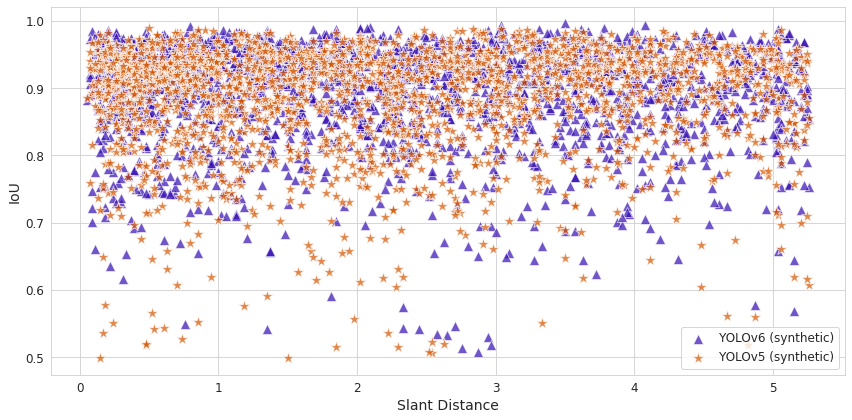

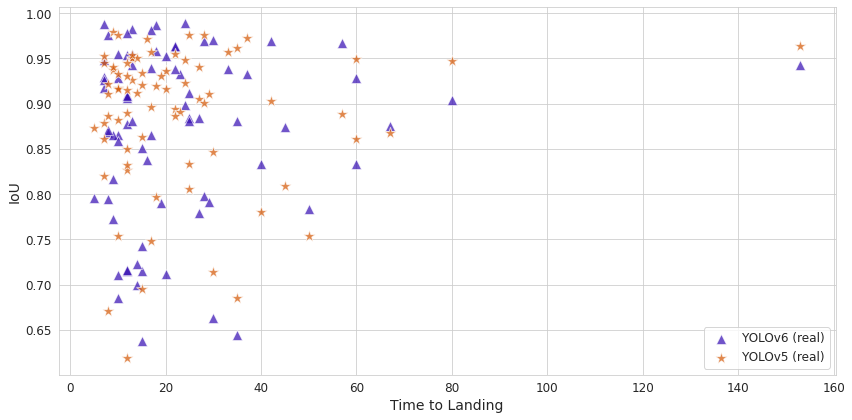

In [ ]:
# --- Synthetic Data: IoU vs Slant Distance ---
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_synth, x="slant_distance", y="iou_v6", marker="^", s=100,
                color=palette["YOLOv6"], alpha=0.7, label="YOLOv6 (synthetic)")
sns.scatterplot(data=df_synth, x="slant_distance", y="iou_v5", marker="*", s=150,
                color=palette["YOLOv5"], alpha=0.7, label="YOLOv5 (synthetic)")

plt.xlabel("Slant Distance")
plt.ylabel("IoU")
plt.legend(loc="best", frameon=True)
plt.tight_layout()

plt.savefig("bf_cp_iou_vs_slant_distance_synthetic.png", dpi=300)

plt.show()

# --- Real Data: IoU vs Time to Landing ---
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_real, x="time_to_landing", y="iou_v6", marker="^", s=100,
                color=palette["YOLOv6"], alpha=0.7, label="YOLOv6 (real)")
sns.scatterplot(data=df_real, x="time_to_landing", y="iou_v5", marker="*", s=150,
                color=palette["YOLOv5"], alpha=0.7, label="YOLOv5 (real)")

plt.xlabel("Time to Landing")
plt.ylabel("IoU")
plt.legend(loc="best", frameon=True)
plt.tight_layout()

plt.savefig("bf_cp_iou_vs_time_to_landing_real.png", dpi=300)

plt.show()

**IoU v6 vs IoU v5 (on synth & real data)**

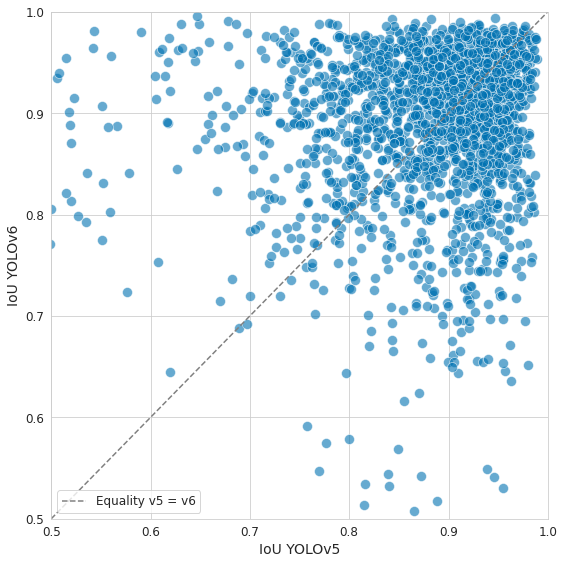

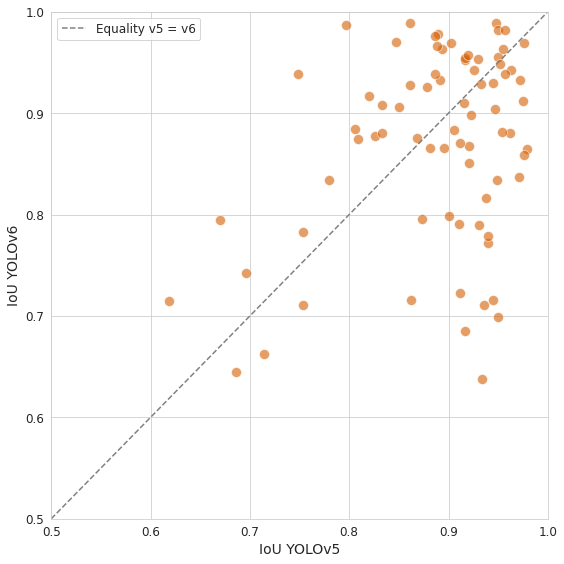

In [20]:
sns.set_style("whitegrid")
plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "legend.fontsize": 12
})

palette = {
    "synth": "#0072B2", 
    "real": "#D55E00", 
}

# FIGURE 1 : Synthetic Data with Zoom
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_synth, x="iou_v5", y="iou_v6", s=100, color=palette["synth"], alpha=0.6)

plt.plot([0.5, 1], [0.5, 1], linestyle='--', color='grey', label="Equality v5 = v6")

plt.xlabel("IoU YOLOv5")
plt.ylabel("IoU YOLOv6")
#plt.title("IoU Comparison in the 0.5–1 Range  — Synthetic Data")
plt.legend()
plt.xlim(0.5, 1)
plt.ylim(0.5, 1)
plt.tight_layout()

plt.savefig("iou_comparison_synthetic.png", dpi=300)

plt.show()

# FIGURE 2 : Real Data with Zoom
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_real, x="iou_v5", y="iou_v6", s=100, color=palette["real"], alpha=0.6)

plt.plot([0.5, 1], [0.5, 1], linestyle='--', color='grey', label="Equality v5 = v6")

plt.xlabel("IoU YOLOv5")
plt.ylabel("IoU YOLOv6")
#plt.title("IoU Comparison in the 0.5–1 Range  — Real Data")
plt.legend()
plt.xlim(0.5, 1)
plt.ylim(0.5, 1)
plt.tight_layout()

plt.savefig("iou_comparison_real.png", dpi=300)

plt.show()

**IoU v6 & v5 comparaison according to slant distance**

<ipython-input-19-9a3c7db89ffa>:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


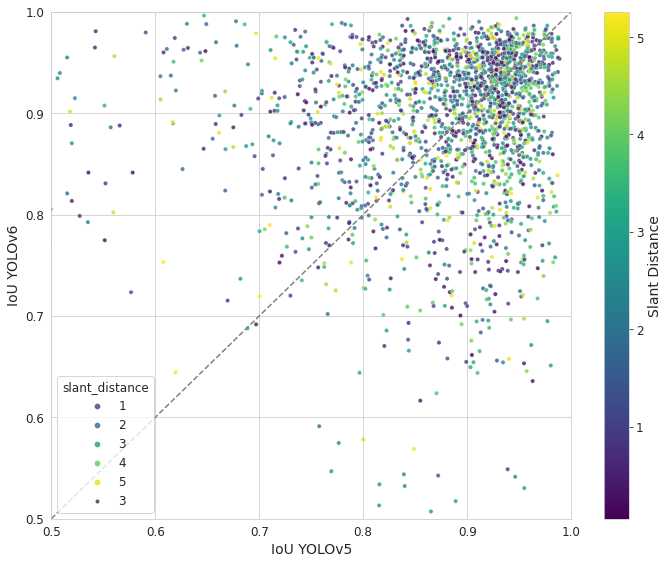

In [19]:
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    data=df_synth,
    x="iou_v5",
    y="iou_v6",
    hue="slant_distance",
    palette="viridis",
    size=3,
    alpha=0.8,
    legend=True
)

plt.plot([0.5, 1], [0.5, 1], linestyle='--', color='gray')
plt.xlabel("IoU YOLOv5")
plt.ylabel("IoU YOLOv6")
plt.title("")
plt.xlim(0.5, 1)
plt.ylim(0.5, 1)

norm = plt.Normalize(df_synth["slant_distance"].min(), df_synth["slant_distance"].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label("Slant Distance")

plt.tight_layout()
plt.savefig("iou_comparison_slant_distance.png", dpi=300)

plt.show()


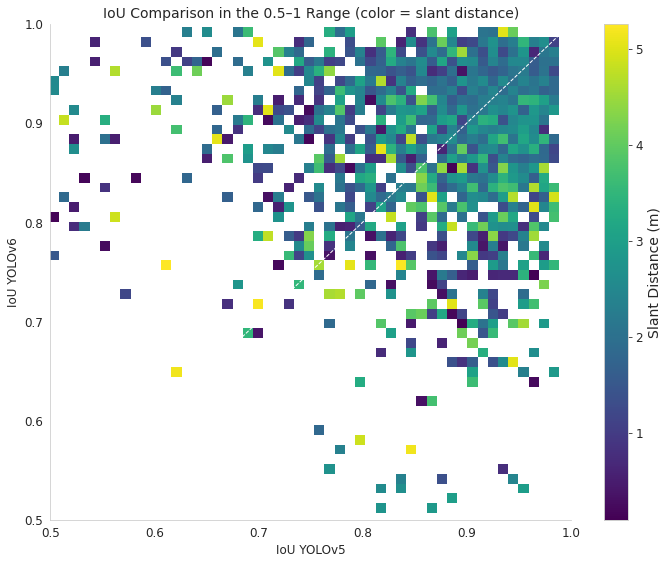

In [18]:
from scipy.stats import binned_statistic_2d

df_visu = df_synth[["iou_v5", "iou_v6", "slant_distance"]].replace([np.inf, -np.inf], np.nan).dropna()

x = df_visu["iou_v5"]
y = df_visu["iou_v6"]
z = df_visu["slant_distance"]

bins = 50

stat, x_edges, y_edges, binnumber = binned_statistic_2d(
    x, y, z, statistic='mean', bins=bins
)

plt.figure(figsize=(10, 8))
X, Y = np.meshgrid(x_edges, y_edges)

c = plt.pcolormesh(X, Y, stat.T, cmap='viridis', shading='auto')

plt.plot([0.5, 1], [0.5, 1], linestyle='--', color='white', linewidth=1)

plt.xlabel("IoU YOLOv5", fontsize=12)
plt.ylabel("IoU YOLOv6", fontsize=12)
plt.title("IoU Comparison in the 0.5–1 Range (color = slant distance)", fontsize=14)
plt.xlim(0.5, 1)
plt.ylim(0.5, 1)

cbar = plt.colorbar(c, label="Slant Distance (m)")
plt.grid(False)
sns.despine()
plt.tight_layout()

plt.savefig("iou_comparison_slant_distance_binned.png", dpi=300)
plt.show()